In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\veera\Documents\3rd SEM\CAPSTONE\canada_crop_yield_prediction_raw_dataset.csv")
df.head()

,year,province,season,crop_type,seeded_area_hectares,harvested_area_hectares,yield_kg_per_hectare_original,production_tonnes,avg_farm_price_per_tonne,average_farm_prices,...,irrigation_used,pesticide_use_level,pesticide_type,organic_farming,farm_size_category,soil_pH,nitrogen_level_kg_per_ha,phosphorus_level_kg_per_ha,potassium_level_kg_per_ha,organic_matter_percent
0,2020,Newfoundland and Labrador,Spring,Clover (Hay),61011.21,NaN,8672.6,488566.8,NaN,126.19,...,No,NaN,"Herbicide (2,4-D)",No,Large,5.56,46.7,32.6,NaN,2.97
1,2000,New Brunswick,Spring,Alfalfa (Hay),86024.11,83690.18,4289.7,359009.7,117.22,NaN,...,No,Low,Biological Control (Beauveria bassiana),No,Large,4.57,56.9,16.2,69.7,2.58
2,2014,Alberta,Summer,Soybeans,131380.69,123394.14,2831.2,349356.6,527.73,527.73,...,No,Medium,Herbicide (MCPA),No,Large,6.55,97.1,NaN,131.8,5.43
3,2019,Alberta,Spring,Hemp (Seed),150980.18,NaN,3433.8,508222.6,167.44,167.44,...,No,Medium,"Herbicide (2,4-D)",No,Large,6.96,97.7,76.3,146.5,4.58
4,2016,Manitoba,Summer,Wheat (Durum),98970.71,93896.61,3144.8,295282.9,189.89,189.89,...,No,Medium,Fungicide (Mancozeb),No,Large,6.86,31.4,38.3,55.2,3.48


In [4]:
df.shape

(17875, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17875 entries, 0 to 17874
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           17875 non-null  int64  
 1   province                       17875 non-null  object 
 2   season                         17875 non-null  object 
 3   crop_type                      17875 non-null  object 
 4   seeded_area_hectares           16100 non-null  float64
 5   harvested_area_hectares        16089 non-null  float64
 6   yield_kg_per_hectare_original  16080 non-null  float64
 7   production_tonnes              16075 non-null  float64
 8   avg_farm_price_per_tonne       16085 non-null  float64
 9   average_farm_prices            16096 non-null  float64
 10  total_farm_value_dollars       16060 non-null  float64
 11  soil_type                      16076 non-null  object 
 12  climate_zone                   16098 non-null 

In [9]:
df.select_dtypes(include='number').columns

Index(['year', 'seeded_area_hectares', 'harvested_area_hectares',
       'yield_kg_per_hectare_original', 'production_tonnes',
       'avg_farm_price_per_tonne', 'average_farm_prices',
       'total_farm_value_dollars', 'avg_temperature_c', 'avg_rainfall_mm',
       'soil_pH', 'nitrogen_level_kg_per_ha', 'phosphorus_level_kg_per_ha',
       'potassium_level_kg_per_ha', 'organic_matter_percent'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,17875.0,2.011993e+03,7.212549e+00,2000.00,2006.00,2.012000e+03,2.018000e+03,2.024000e+03
seeded_area_hectares,16100.0,6.346269e+04,4.848735e+04,20.66,15335.99,6.054455e+04,1.058452e+05,2.129756e+05
harvested_area_hectares,16089.0,6.055191e+04,4.623182e+04,19.61,14837.39,5.779575e+04,1.008994e+05,2.095520e+05
yield_kg_per_hectare_original,16080.0,1.733058e+04,3.262878e+04,1297.40,2713.80,4.105500e+03,1.088348e+04,2.020364e+05
production_tonnes,16075.0,7.120803e+05,1.484257e+06,213.90,81194.90,2.228807e+05,4.476529e+05,1.011587e+07
avg_farm_price_per_tonne,16085.0,6.498003e+02,5.408466e+02,62.23,284.08,4.702500e+02,7.235000e+02,2.717980e+03
average_farm_prices,16096.0,6.497620e+02,5.406880e+02,62.23,285.77,4.718750e+02,7.190875e+02,2.717980e+03
total_farm_value_dollars,16060.0,6.143728e+08,1.864930e+09,187720.96,37762150.07,8.531929e+07,1.714195e+08,1.803013e+10
avg_temperature_c,16089.0,5.294737e+00,1.615336e+00,1.54,4.03,5.210000e+00,6.520000e+00,9.170000e+00
avg_rainfall_mm,16096.0,8.856672e+02,3.075001e+02,255.00,537.00,1.007000e+03,1.113000e+03,1.340000e+03


In [11]:
df.duplicated().sum()

np.int64(1625)

In [12]:
df = df.drop_duplicates()
df.shape

(16250, 25)

In [13]:
df.isna().sum()

year                                0
province                            0
season                              0
crop_type                           0
seeded_area_hectares             1625
harvested_area_hectares          1625
yield_kg_per_hectare_original    1625
production_tonnes                1625
avg_farm_price_per_tonne         1625
average_farm_prices              1625
total_farm_value_dollars         1625
soil_type                        1625
climate_zone                     1625
avg_temperature_c                1625
avg_rainfall_mm                  1625
irrigation_used                  1625
pesticide_use_level              1625
pesticide_type                   1625
organic_farming                  1625
farm_size_category               1625
soil_pH                          1625
nitrogen_level_kg_per_ha         1625
phosphorus_level_kg_per_ha       1625
potassium_level_kg_per_ha        1625
organic_matter_percent           1625
dtype: int64

In [14]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values Percentage (%):")
print(missing_percent)


Missing Values Percentage (%):
year                              0.0
province                          0.0
season                            0.0
crop_type                         0.0
seeded_area_hectares             10.0
harvested_area_hectares          10.0
yield_kg_per_hectare_original    10.0
production_tonnes                10.0
avg_farm_price_per_tonne         10.0
average_farm_prices              10.0
total_farm_value_dollars         10.0
soil_type                        10.0
climate_zone                     10.0
avg_temperature_c                10.0
avg_rainfall_mm                  10.0
irrigation_used                  10.0
pesticide_use_level              10.0
pesticide_type                   10.0
organic_farming                  10.0
farm_size_category               10.0
soil_pH                          10.0
nitrogen_level_kg_per_ha         10.0
phosphorus_level_kg_per_ha       10.0
potassium_level_kg_per_ha        10.0
organic_matter_percent           10.0
dtype: float64


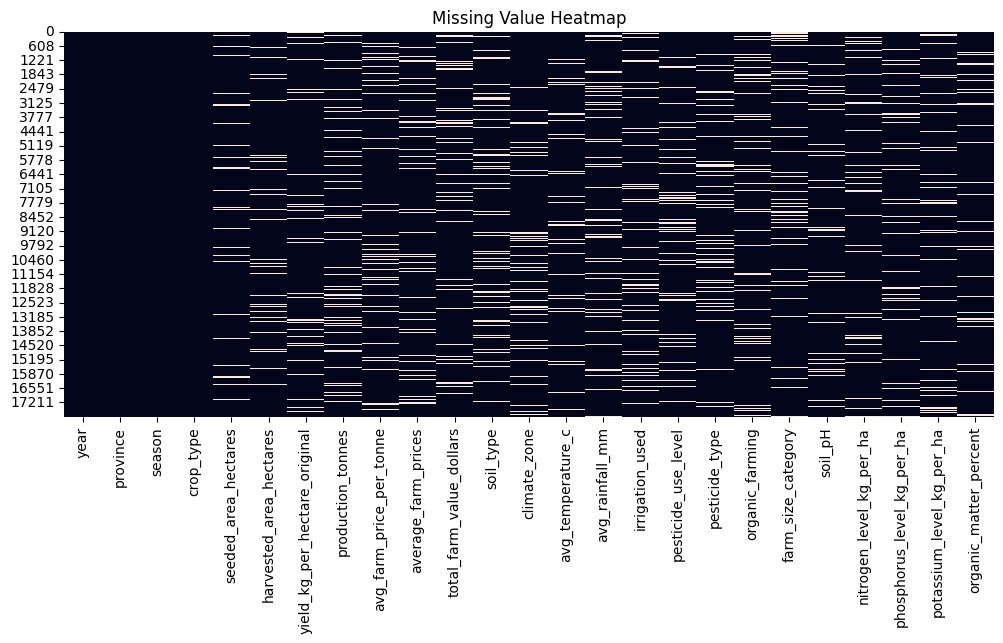

In [16]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

## Missing Value Heatmap Insights

- Core fields like **year, province, season, and crop_type** have **no missing values**, showing strong data reliability.
- Several numeric and categorical fields (area, yield, prices, soil, climate, nutrients) have **scattered missing values** across the dataset.
- Missingness is **randomly distributed**, meaning it is not tied to any specific year, province, or crop.



In [17]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [18]:
print(" Numeric Columns:")
print(num_cols)

print("\n Categorical Columns:")
print(cat_cols)

 Numeric Columns:
Index(['year', 'seeded_area_hectares', 'harvested_area_hectares',
       'yield_kg_per_hectare_original', 'production_tonnes',
       'avg_farm_price_per_tonne', 'average_farm_prices',
       'total_farm_value_dollars', 'avg_temperature_c', 'avg_rainfall_mm',
       'soil_pH', 'nitrogen_level_kg_per_ha', 'phosphorus_level_kg_per_ha',
       'potassium_level_kg_per_ha', 'organic_matter_percent'],
      dtype='object')

 Categorical Columns:
Index(['province', 'season', 'crop_type', 'soil_type', 'climate_zone',
       'irrigation_used', 'pesticide_use_level', 'pesticide_type',
       'organic_farming', 'farm_size_category'],
      dtype='object')


In [19]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna('Missing')

In [20]:
df.isna().sum()

year                             0
province                         0
season                           0
crop_type                        0
seeded_area_hectares             0
harvested_area_hectares          0
yield_kg_per_hectare_original    0
production_tonnes                0
avg_farm_price_per_tonne         0
average_farm_prices              0
total_farm_value_dollars         0
soil_type                        0
climate_zone                     0
avg_temperature_c                0
avg_rainfall_mm                  0
irrigation_used                  0
pesticide_use_level              0
pesticide_type                   0
organic_farming                  0
farm_size_category               0
soil_pH                          0
nitrogen_level_kg_per_ha         0
phosphorus_level_kg_per_ha       0
potassium_level_kg_per_ha        0
organic_matter_percent           0
dtype: int64

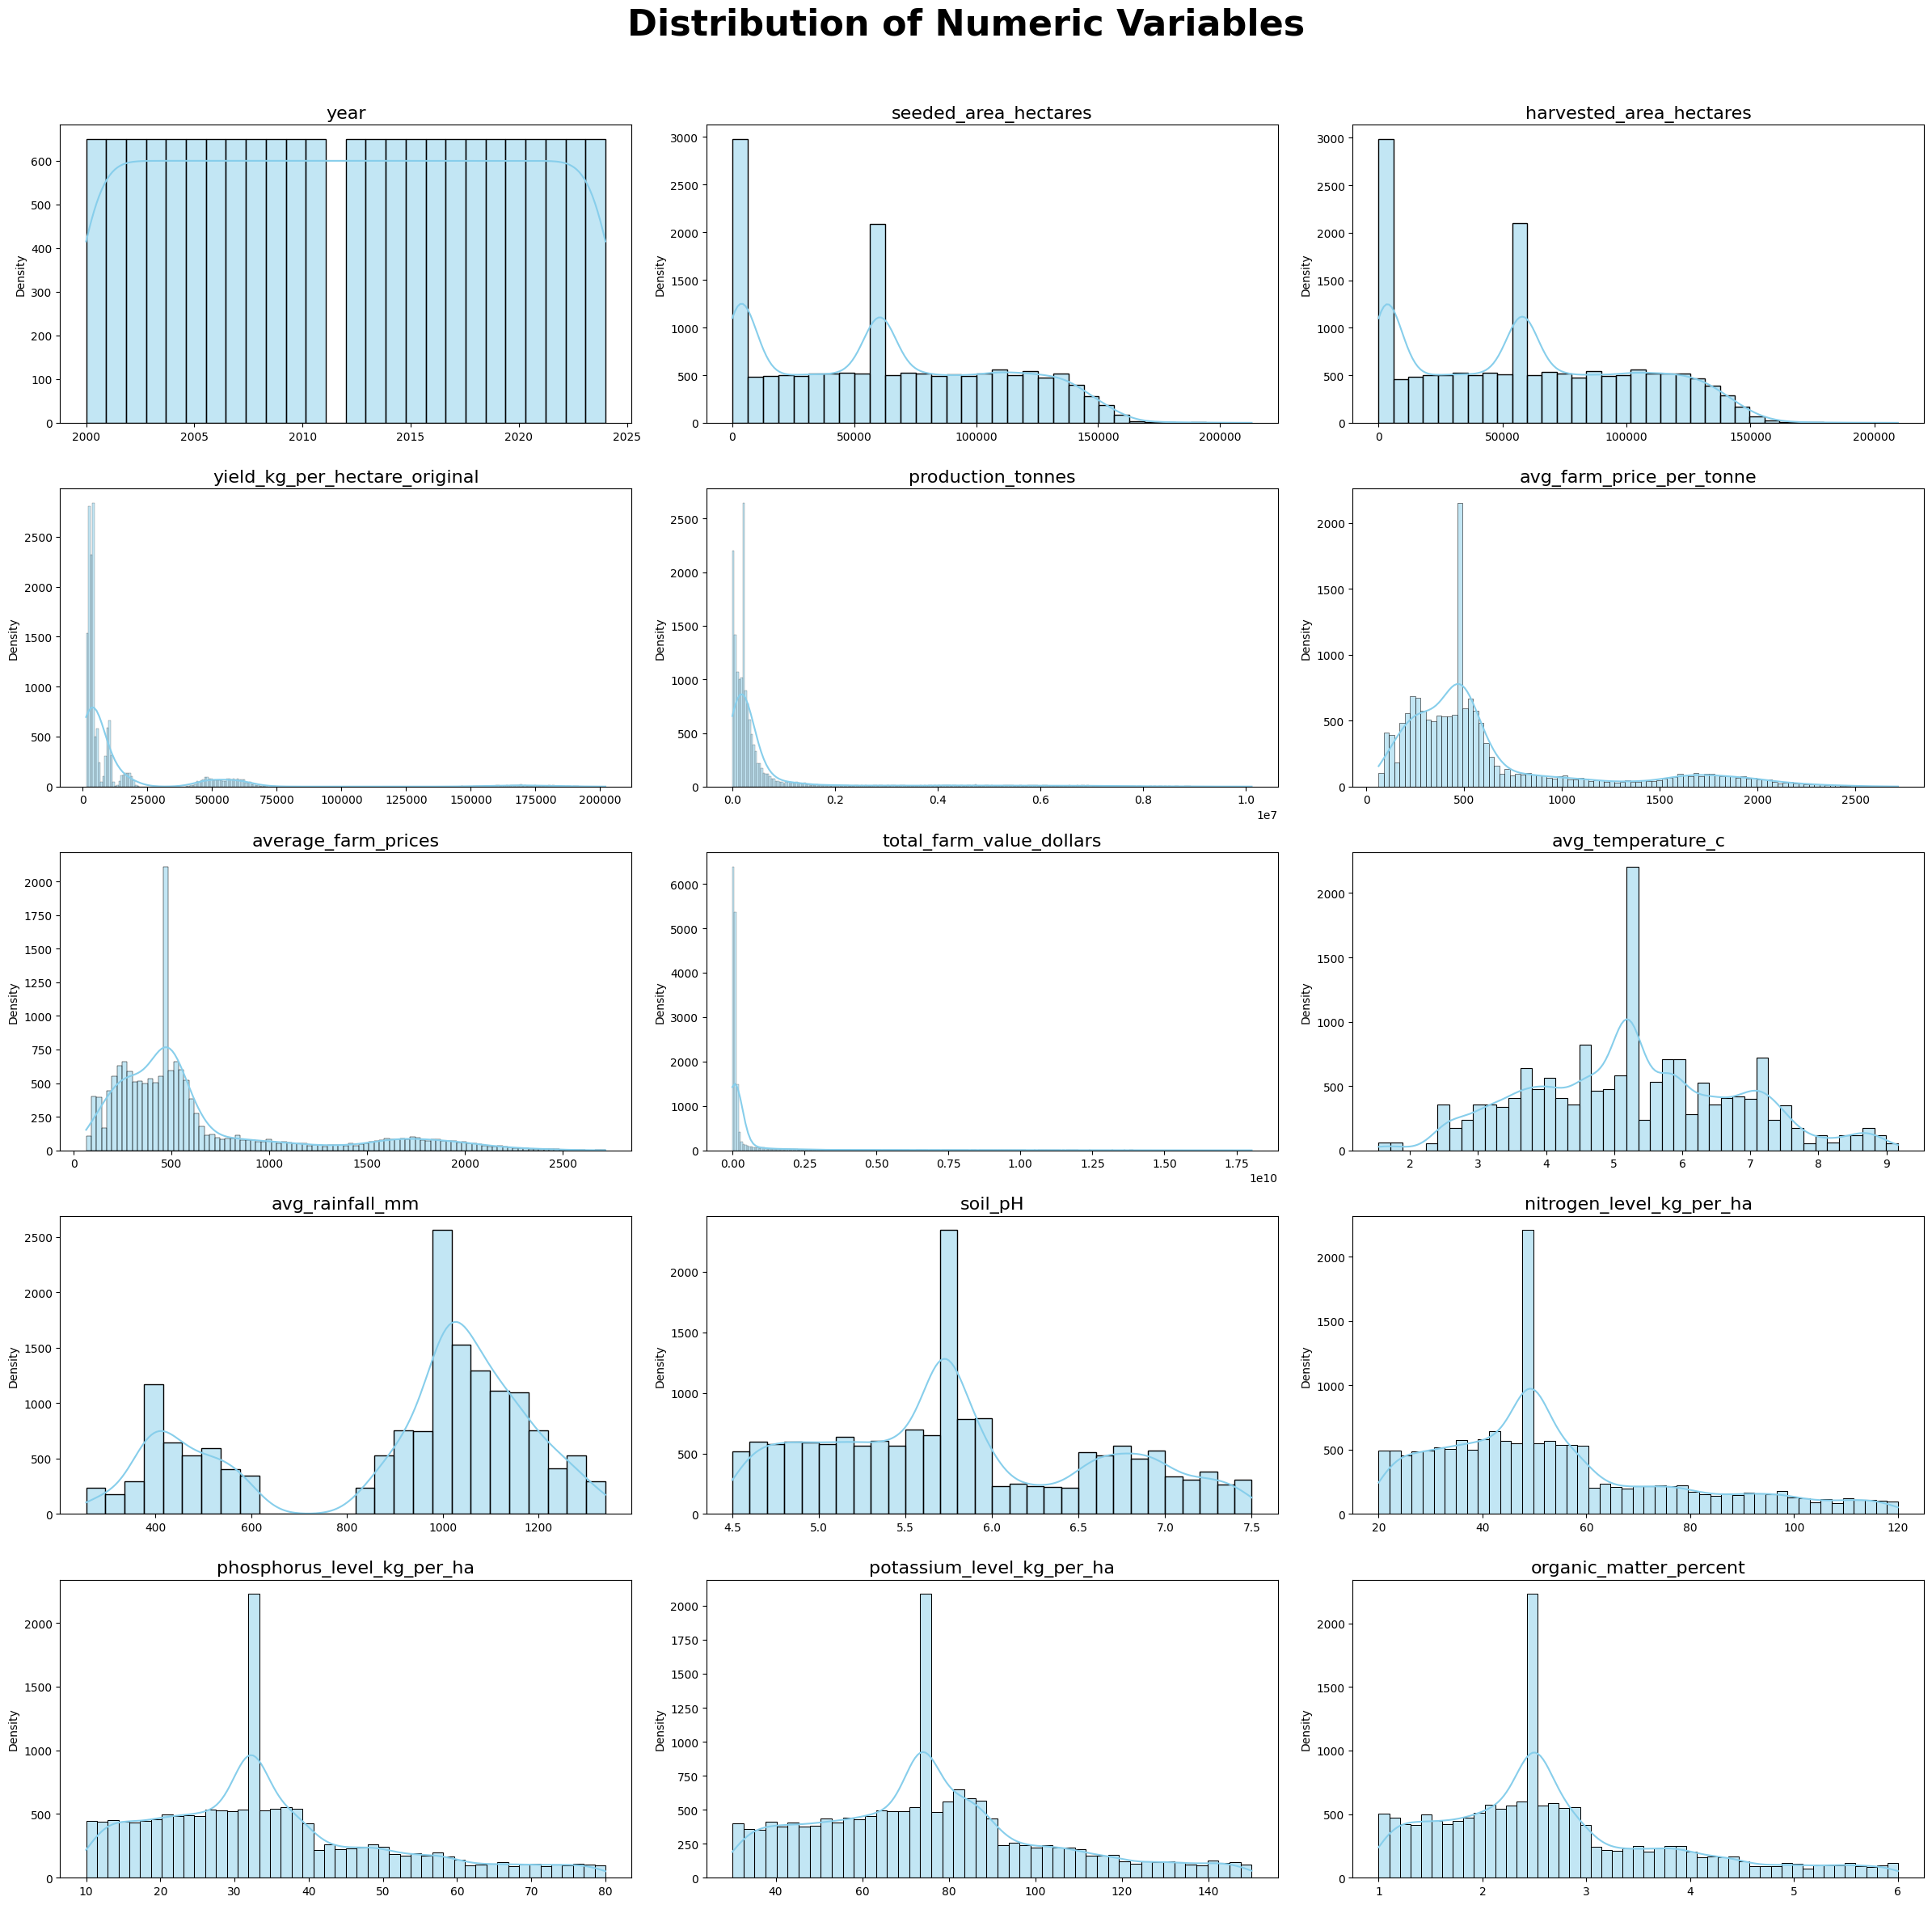

In [21]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(5, 3, figsize=(24, 24))   
fig.suptitle("Distribution of Numeric Variables", size=32, weight='bold')

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Insights from Numeric Variable Distributions

- **Year** is uniformly distributed (2000–2024), showing consistent data coverage across time.
- **Seeded and harvested area** are right-skewed, indicating many small farms and a few very large ones.
- **Yield and production** show strong right-skewness, meaning high-output crops or regions are limited in number.
- **Farm prices** have moderate variation with long tails, reflecting price differences across crops and years.
- **Climate variables** (temperature, rainfall) show natural variation across provinces; rainfall displays clear multi-modal patterns.
- **Soil metrics** (pH, nutrients, organic matter) appear realistic, with right-skew in nutrients caused by differences in fertilization levels.


### Categorical columns

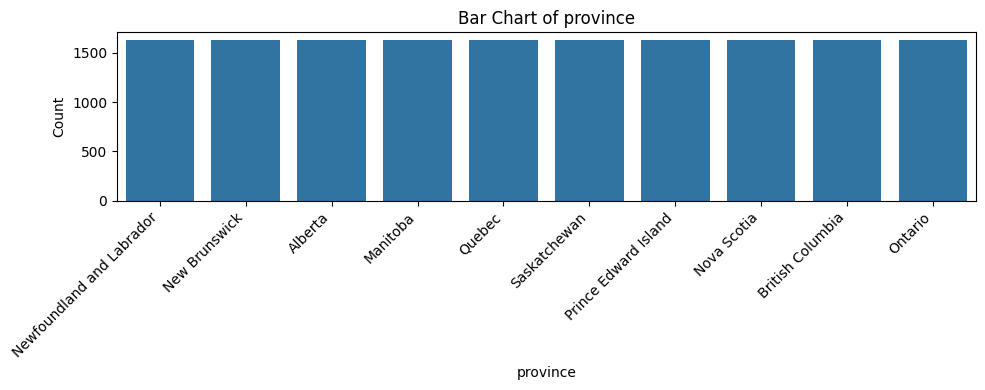

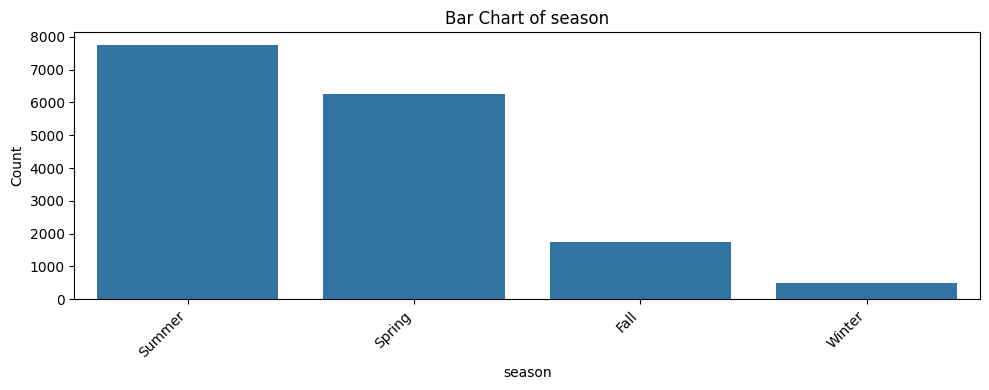

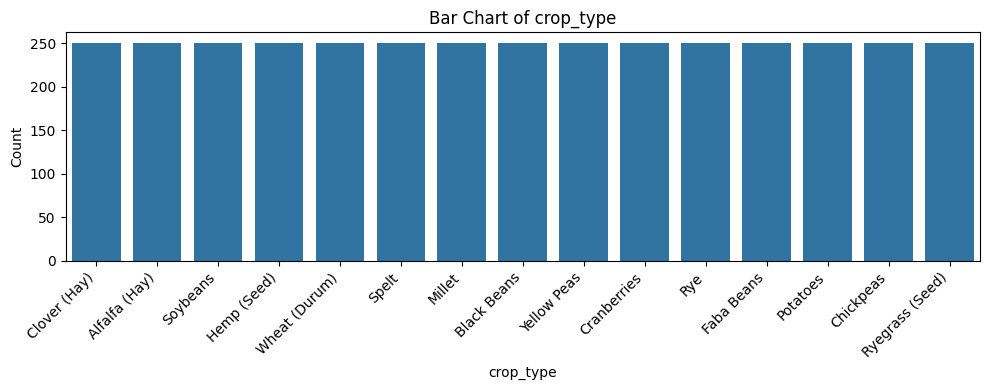

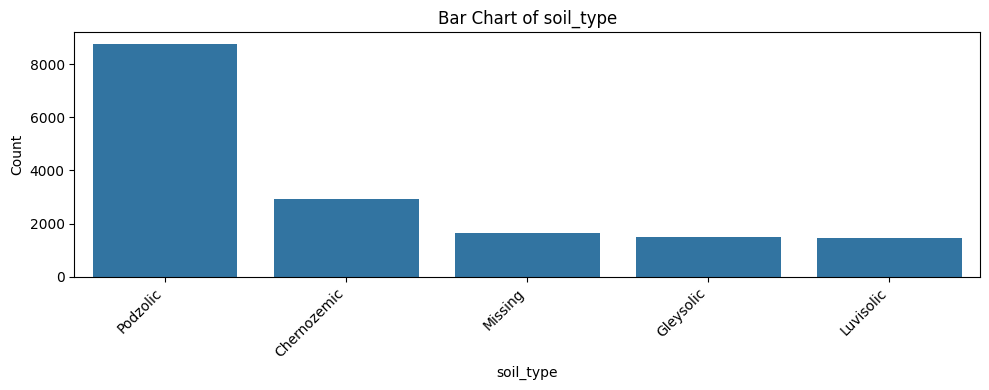

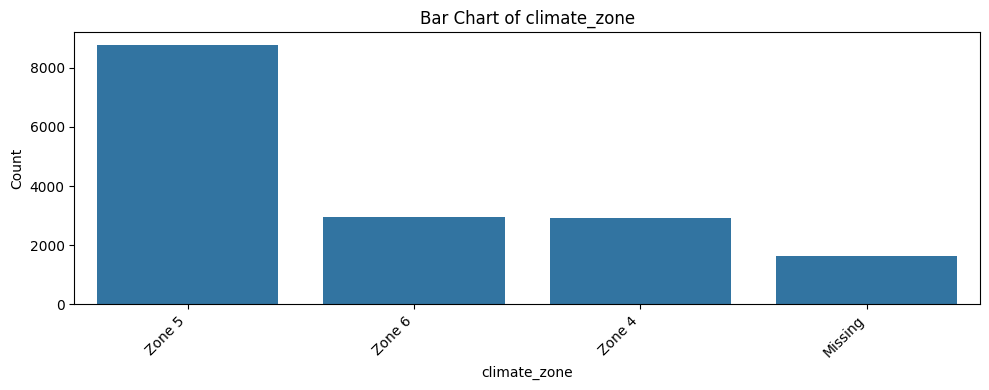

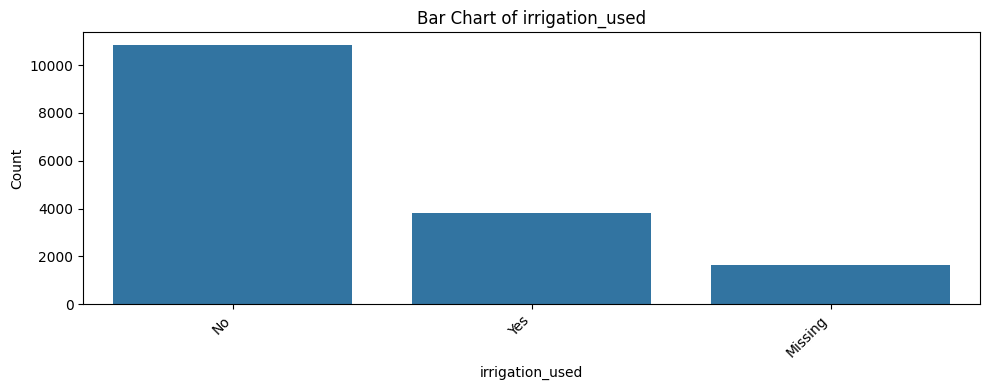

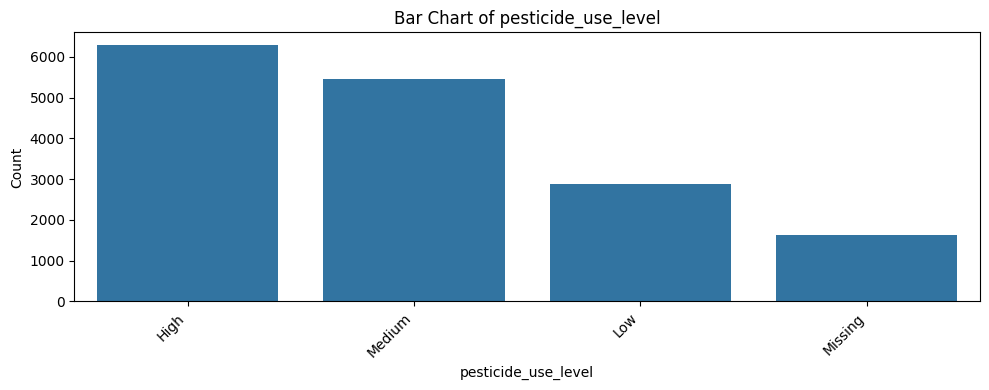

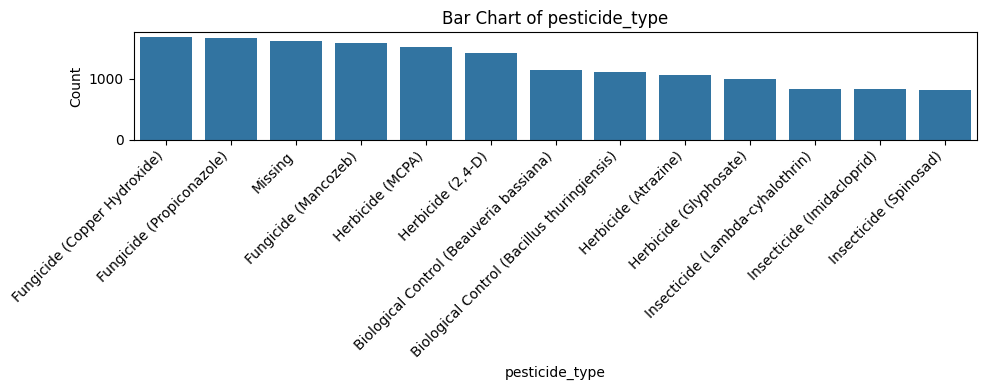

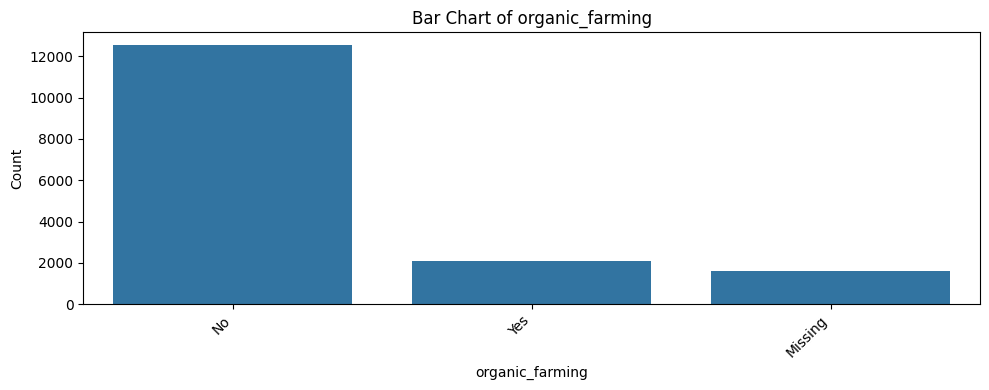

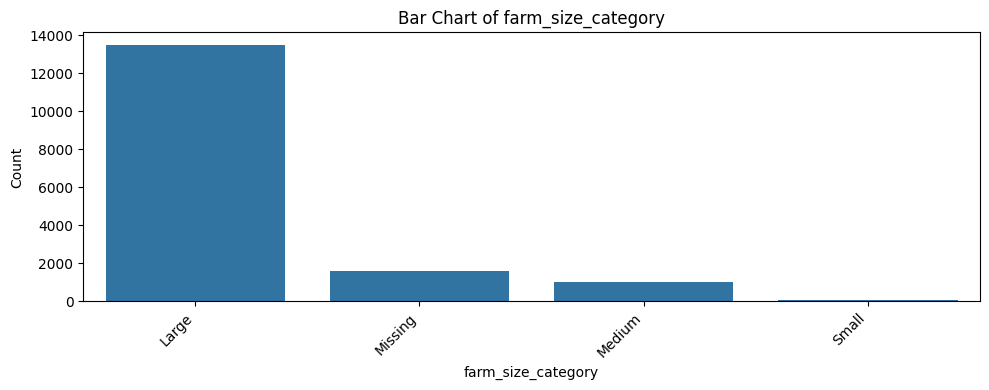

In [22]:
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    
    value_counts = df[col].value_counts().head(15)
    sns.barplot(x=value_counts.index, y=value_counts.values)
    
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    
    plt.tight_layout()
    plt.show()

## Categorical Variable Insights

- **Province:** All provinces are evenly represented, ensuring balanced regional analysis.
- **Season:** Summer and Spring dominate, reflecting peak farming periods; Fall and Winter have fewer records.
- **Crop Type:** All crop categories appear uniformly distributed, supporting fair crop-to-crop comparison.
- **Soil Type:** Podzolic soils are most common; other soil types appear moderately with some missing values.
- **Climate Zone:** Zone 5 is the largest group, with good coverage of Zones 4 and 6 for climate variation.
- **Irrigation Used:** Most farms report no irrigation, indicating reliance on natural rainfall.
- **Pesticide Use Level:** High and Medium pesticide levels are most frequent, showing typical farming intensity.
- **Pesticide Type:** Fungicides and herbicides dominate; insecticides are less common.
- **Organic Farming:** Majority of farms are non-organic, with a small portion practicing organic methods.
- **Farm Size Category:** Large farms are most common, with fewer medium and small farms.


### Univariate

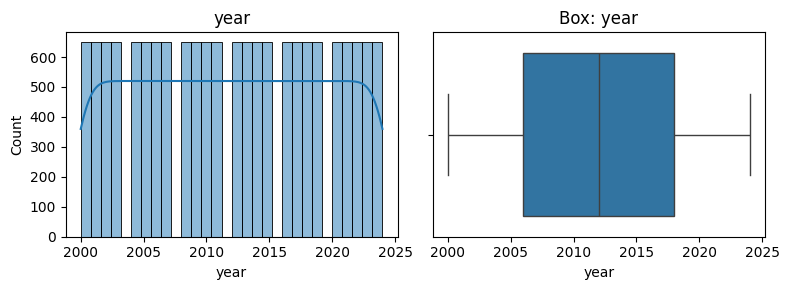

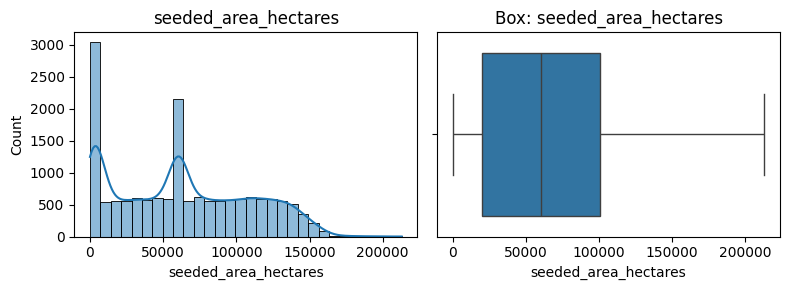

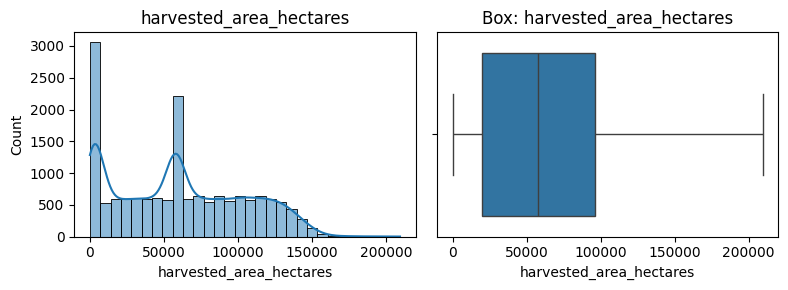

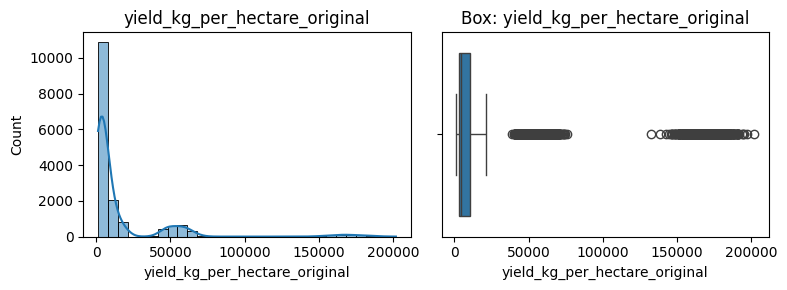

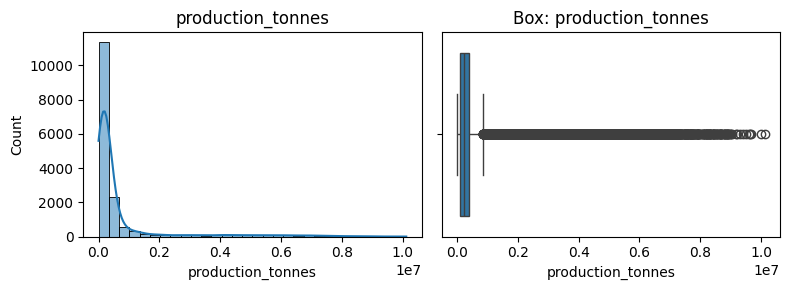

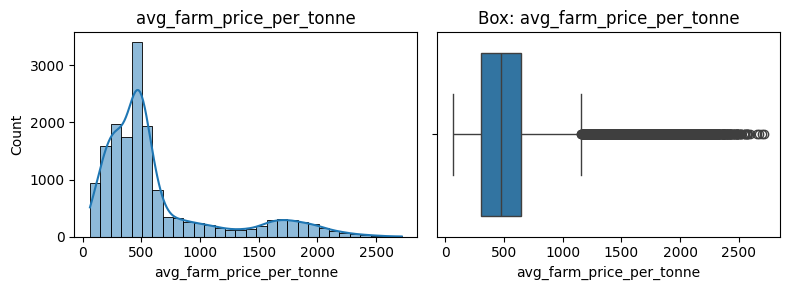

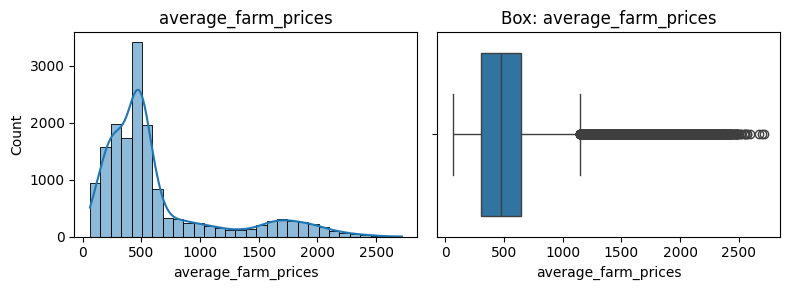

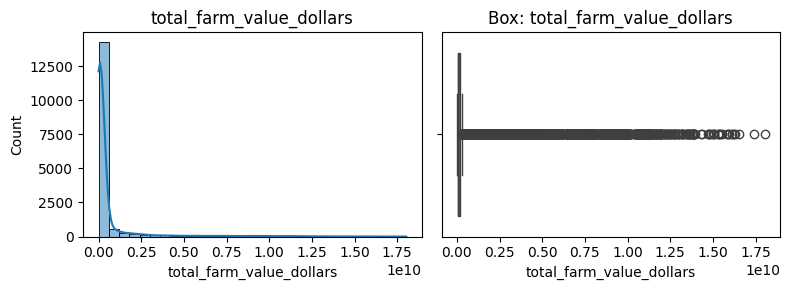

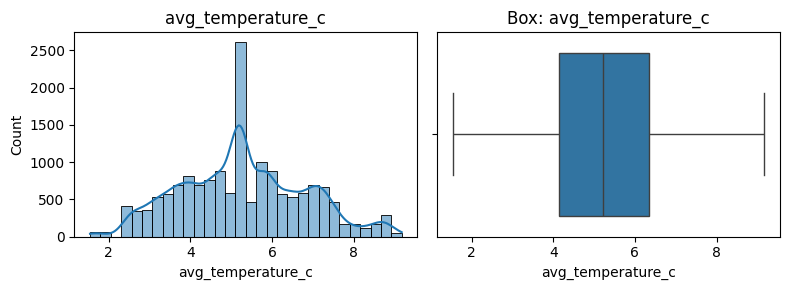

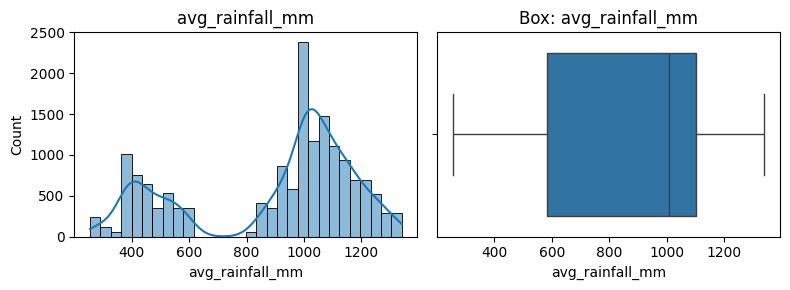

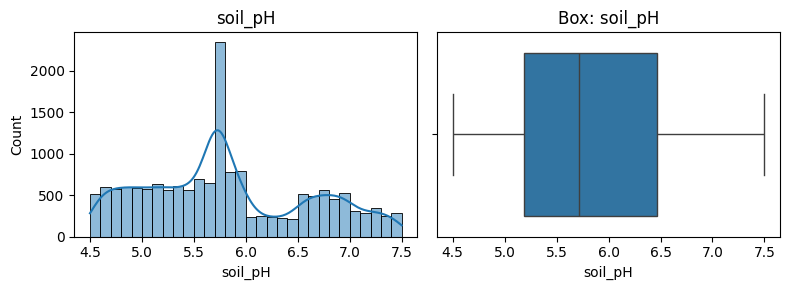

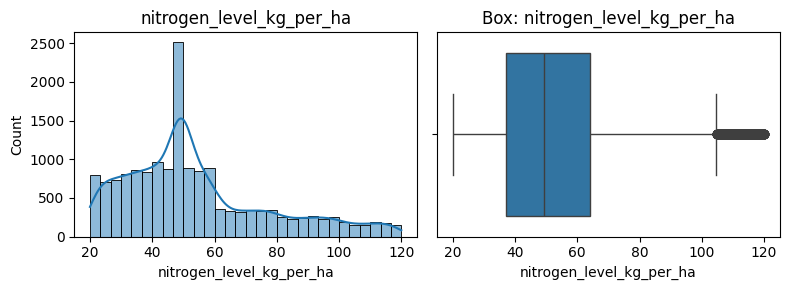

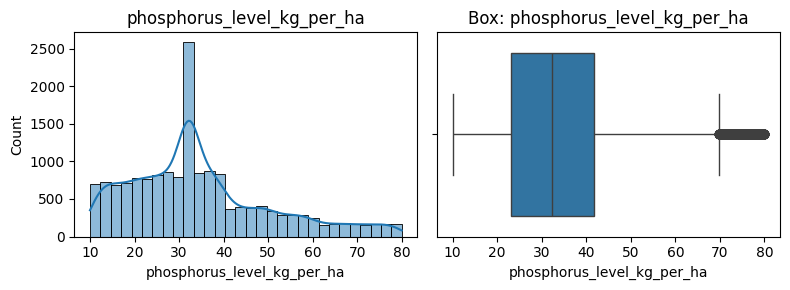

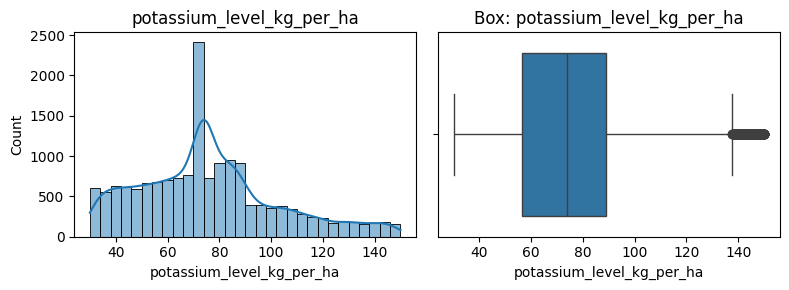

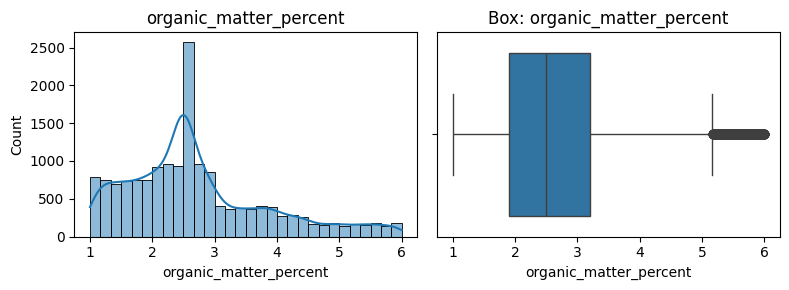


 PROVINCE
province
Newfoundland and Labrador    1625
New Brunswick                1625
Alberta                      1625
Manitoba                     1625
Quebec                       1625
Saskatchewan                 1625
Prince Edward Island         1625
Nova Scotia                  1625
British Columbia             1625
Ontario                      1625
Name: count, dtype: int64

 SEASON
season
Summer    7750
Spring    6250
Fall      1750
Winter     500
Name: count, dtype: int64

 CROP_TYPE
crop_type
Clover (Hay)     250
Alfalfa (Hay)    250
Soybeans         250
Hemp (Seed)      250
Wheat (Durum)    250
Spelt            250
Millet           250
Black Beans      250
Yellow Peas      250
Cranberries      250
Name: count, dtype: int64

 SOIL_TYPE
soil_type
Podzolic       8767
Chernozemic    2925
Missing        1625
Gleysolic      1475
Luvisolic      1458
Name: count, dtype: int64

 CLIMATE_ZONE
climate_zone
Zone 5     8765
Zone 6     2939
Zone 4     2921
Missing    1625
Name: count, d

In [23]:

num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1); sns.histplot(df[col].dropna(), bins=30, kde=True); plt.title(col)
    plt.subplot(1,2,2); sns.boxplot(x=df[col].dropna()); plt.title('Box: '+col)
    plt.tight_layout(); plt.show()

#top 10 counts for each
for c in cat_cols:
    print("\n", c.upper())
    print(df[c].value_counts().head(10))


## Univariate Distribution Insights

- **Year:** Uniformly distributed from 2000–2024, showing consistent reporting across all years.
- **Seeded & Harvested Area (ha):** Strong right-skew; most farms have small–medium land areas, while a few very large farms push the upper range.
- **Yield (kg/ha):** Highly right-skewed with many low-to-moderate values and a few extremely high outliers, indicating variability across crops and regions.
- **Production (tonnes):** Very right-skewed; a small number of crop–province combinations contribute disproportionately high production volumes.
- **Average Farm Prices & Price per Tonne:** Moderate distribution with long right tails due to premium-priced crops; clear presence of price outliers.
- **Total Farm Value (CAD):** Extremely right-skewed with many high-value outliers, driven by large-scale operations.
- **Average Temperature (°C):** Smooth distribution centered around 5–6°C, matching typical Canadian growing-season conditions.
- **Average Rainfall (mm):** Multi-modal pattern reflecting different Canadian climate zones; ranges mostly from 400–1200 mm.
- **Soil pH:** Uniformly distributed between 4.5–7.5, centered near mildly acidic to neutral; no extreme or unrealistic values.
- **Nitrogen, Phosphorus, Potassium (kg/ha):** Right-skewed distributions with most farms applying moderate nutrient levels and fewer farms applying high amounts.
- **Organic Matter (%):** Slight right-skew with most soils between 2–3%; a few high values above 5% appear as outliers.



### Bivariate

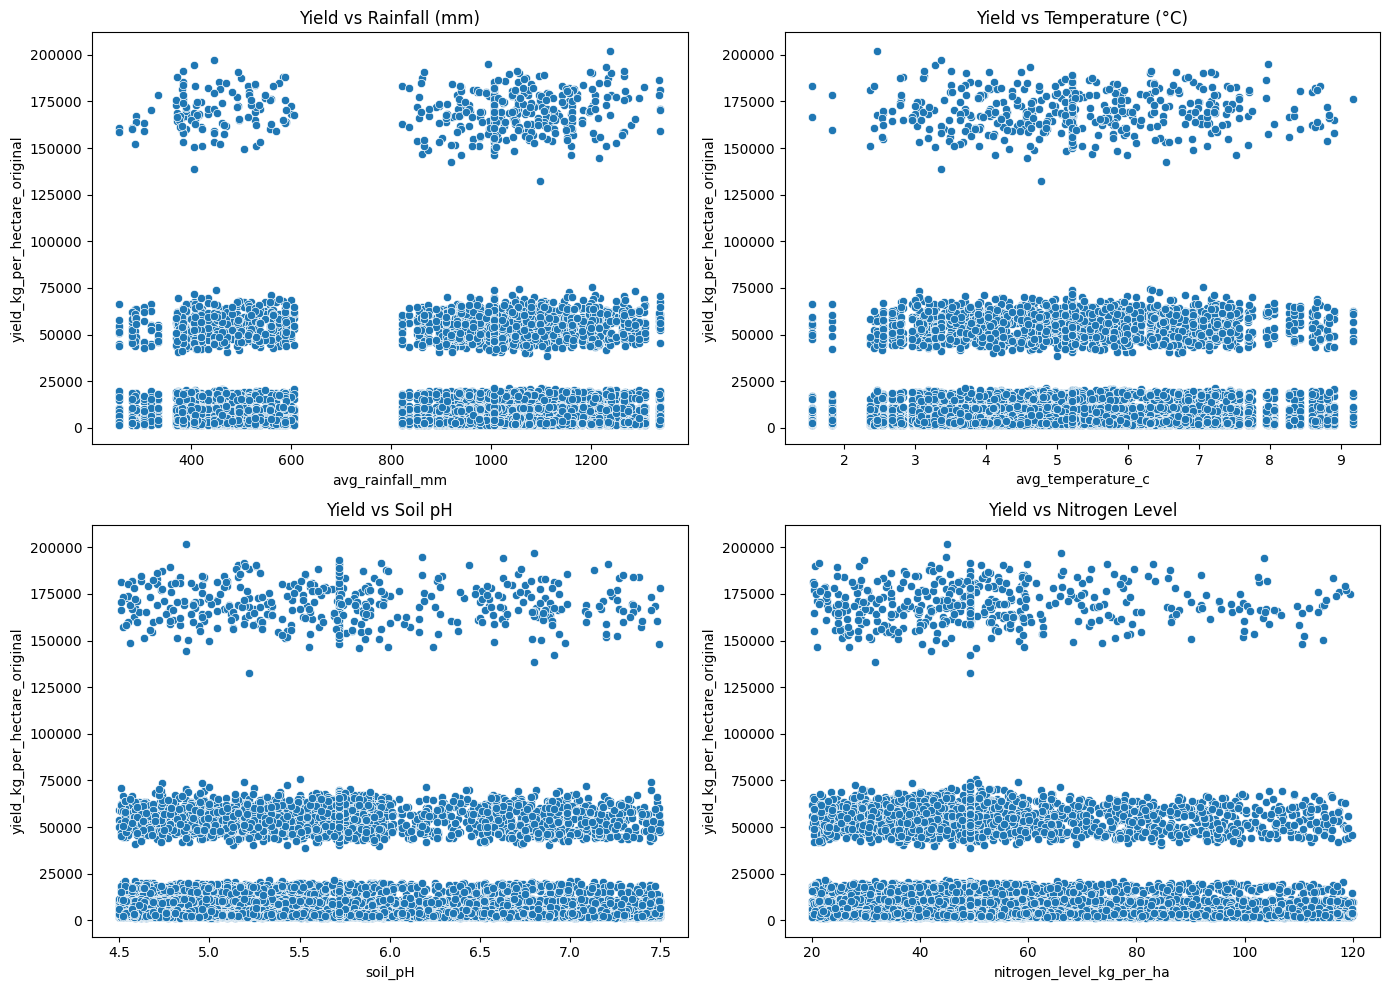

In [25]:
plt.figure(figsize=(14, 10))

# Yield vs Rainfall
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='avg_rainfall_mm', y='yield_kg_per_hectare_original')
plt.title("Yield vs Rainfall (mm)")

# Yield vs Temperature
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='avg_temperature_c', y='yield_kg_per_hectare_original')
plt.title("Yield vs Temperature (°C)")

# Yield vs Soil pH
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='soil_pH', y='yield_kg_per_hectare_original')
plt.title("Yield vs Soil pH")

# Yield vs Nitrogen
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='nitrogen_level_kg_per_ha', y='yield_kg_per_hectare_original')
plt.title("Yield vs Nitrogen Level")

plt.tight_layout()
plt.show()

## Bivariate Insights: Yield vs Climate & Soil Factors

- **Yield vs Rainfall:** No strong linear pattern; yield clusters appear across both low and high rainfall regions, suggesting rainfall alone does not determine yield.
- **Yield vs Temperature:** Yield values are widely spread across all temperature ranges, indicating that multiple crops thrive at different temperature levels.
- **Yield vs Soil pH:** Yield remains consistent across pH 4.5–7.5, showing no clear relationship, though slightly higher yields appear around neutral pH.
- **Yield vs Nitrogen Level:** Wide yield distribution across all nitrogen levels, with no strong upward trend, meaning fertilizer quantity alone does not guarantee higher yields.



###
Categorical vs numerical

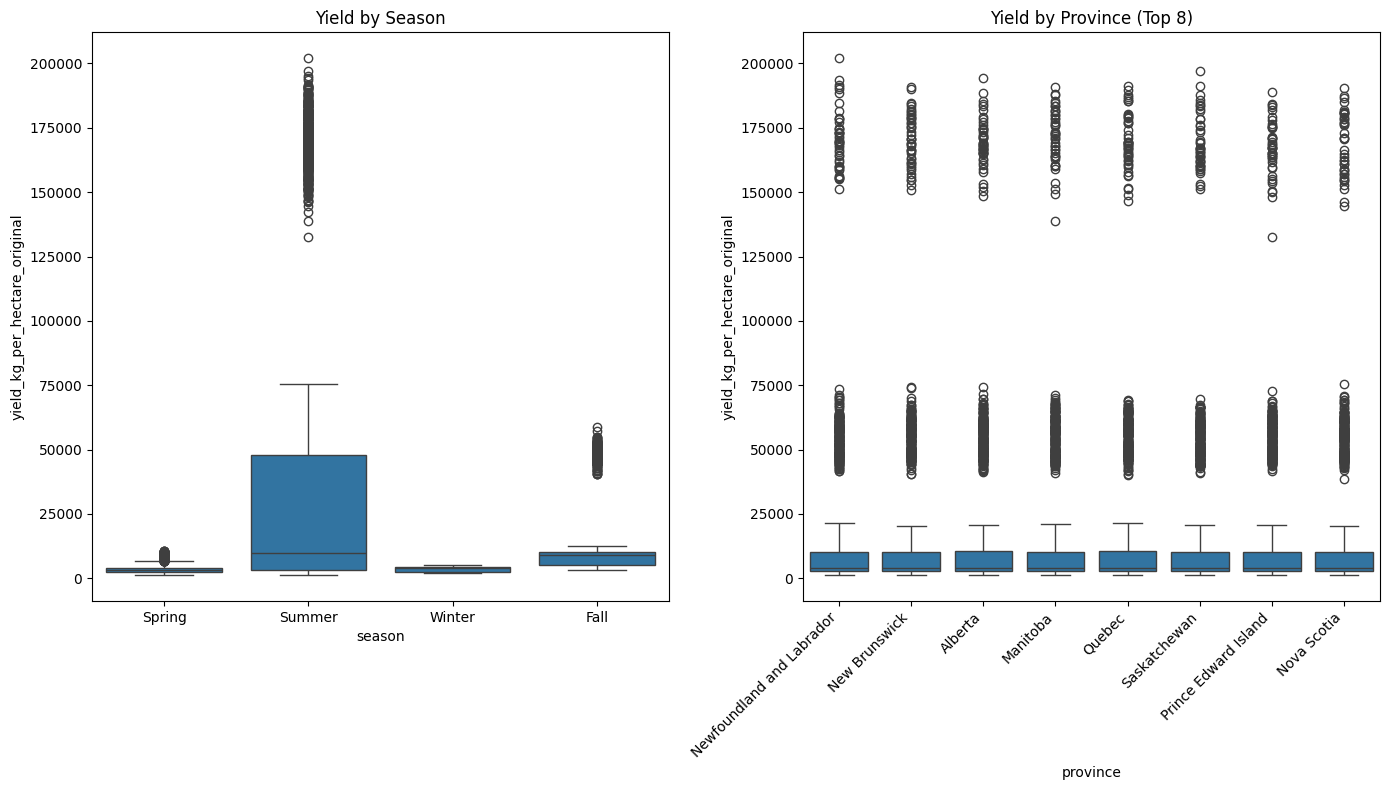

In [26]:
plt.figure(figsize=(14, 8))

# Yield by Season
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='season', y='yield_kg_per_hectare_original')
plt.title("Yield by Season")

# Yield by Province (top 8)
plt.subplot(1, 2, 2)
top_prov = df['province'].value_counts().head(8).index
sns.boxplot(data=df[df['province'].isin(top_prov)],
            x='province', y='yield_kg_per_hectare_original')
plt.title("Yield by Province (Top 8)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Bivariate Insights: Yield by Season & Province

- **Yield by Season:**  
  Summer shows the highest yield variation and contains most of the extreme high-yield outliers, indicating that peak growing conditions occur in this season. Spring and Fall have moderate yields, while Winter yields remain consistently low due to limited agricultural activity.

- **Yield by Province:**  
  Yield distribution is relatively similar across provinces, with all regions showing a wide range of values. High-yield outliers appear in every province, suggesting that crop type and farm practices influence yield more than geographic location alone.


## Multivariate

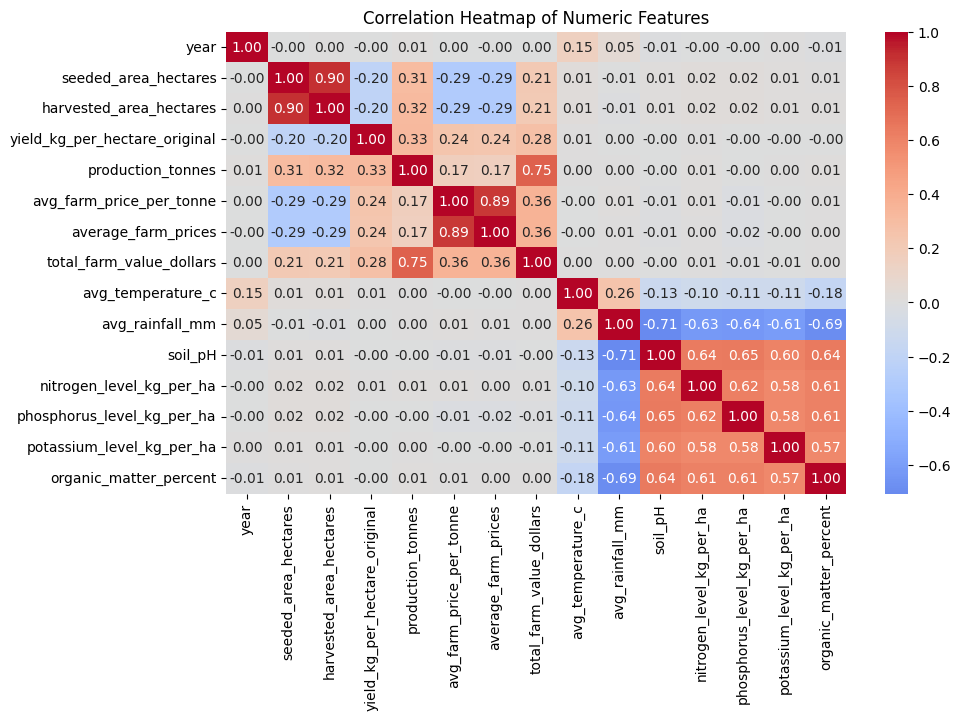

yield_kg_per_hectare_original    1.000000
production_tonnes                0.326344
total_farm_value_dollars         0.280240
avg_farm_price_per_tonne         0.243273
average_farm_prices              0.236249
nitrogen_level_kg_per_ha         0.005388
avg_temperature_c                0.005200
avg_rainfall_mm                  0.000087
organic_matter_percent          -0.000558
phosphorus_level_kg_per_ha      -0.001299
year                            -0.001993
potassium_level_kg_per_ha       -0.002284
soil_pH                         -0.004468
seeded_area_hectares            -0.200119
harvested_area_hectares         -0.202913
Name: yield_kg_per_hectare_original, dtype: float64

In [28]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
# Check correlation of yield with other features
corr['yield_kg_per_hectare_original'].sort_values(ascending=False)

##  Correlation Insights

- Seeded area and harvested area are strongly linked — bigger farms sow more and harvest more.
- Production and total farm value move together — more production usually means higher value.
- Farm price measures are similar because they are closely connected.
- Rainfall is linked with soil conditions — more rain usually means lower soil pH and lower nutrients.
- Nutrient levels (N, P, K) increase when organic matter is higher.
- Yield does not depend strongly on any single factor — it is influenced by many things together.


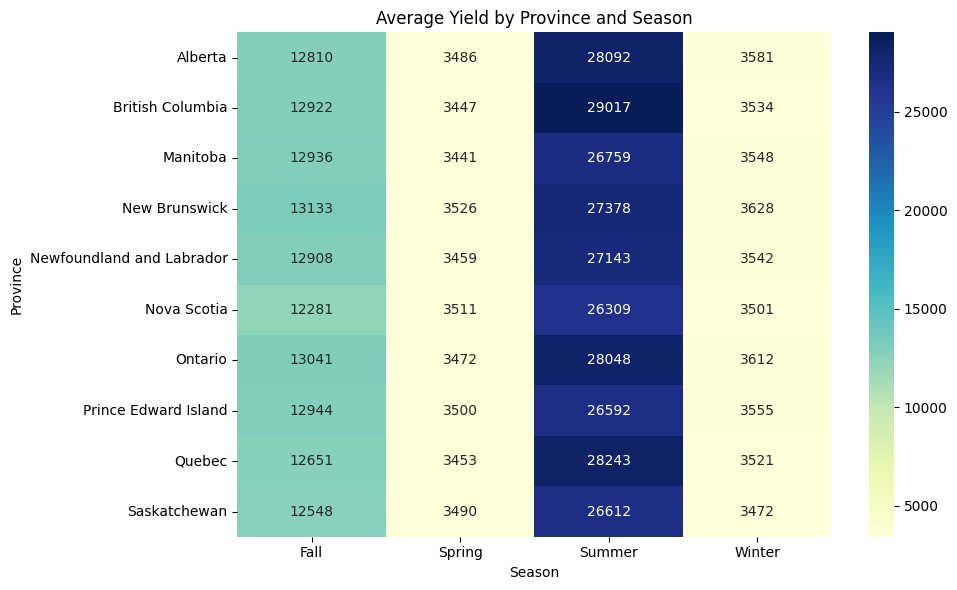

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot: mean yield for each province–season
pivot_yield = (
    df.pivot_table(
        values="yield_kg_per_hectare_original",
        index="province",
        columns="season",
        aggfunc="mean"
    )
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_yield, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Yield by Province and Season")
plt.ylabel("Province")
plt.xlabel("Season")
plt.tight_layout()
plt.show()


## Insights from Average Yield by Province and Season

- **Summer** consistently shows the **highest yield** across all provinces.
- **Spring and Winter** have much lower yields, as expected due to limited growing conditions.
- Yield differences between provinces are **small**, showing that most regions perform similarly.
- British Columbia and Ontario show slightly **higher summer yields**, but overall variation is minimal.
- The pattern confirms that **season has a stronger impact on yield** than province.
